In [293]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

%matplotlib inline
sns.set_style('whitegrid')

# Data Collection

In [339]:
web = 'http://ufcstats.com/statistics/fighters?char=c&page=1'

response = requests.get(web)
soup = BeautifulSoup(response.content, 'html.parser')
result = soup.find('table', {'class': 'b-statistics__table'}).find('tbody').find_all('tr')
len(result)

1

In [342]:
webs = ['http://ufcstats.com/statistics/fighters?char=a&page=',
        'http://ufcstats.com/statistics/fighters?char=b&page=',
        'http://ufcstats.com/statistics/fighters?char=c&page=',
        'http://ufcstats.com/statistics/fighters?char=d&page=',
        'http://ufcstats.com/statistics/fighters?char=e&page=',
        'http://ufcstats.com/statistics/fighters?char=f&page=',
        'http://ufcstats.com/statistics/fighters?char=g&page=',
        'http://ufcstats.com/statistics/fighters?char=h&page=',
        'http://ufcstats.com/statistics/fighters?char=i&page=',
        'http://ufcstats.com/statistics/fighters?char=j&page=',
        'http://ufcstats.com/statistics/fighters?char=k&page=',
        'http://ufcstats.com/statistics/fighters?char=l&page=',
        'http://ufcstats.com/statistics/fighters?char=m&page=',
        'http://ufcstats.com/statistics/fighters?char=n&page=',
        'http://ufcstats.com/statistics/fighters?char=o&page=',
        'http://ufcstats.com/statistics/fighters?char=p&page=',
        'http://ufcstats.com/statistics/fighters?char=q&page=',
        'http://ufcstats.com/statistics/fighters?char=r&page=',
        'http://ufcstats.com/statistics/fighters?char=s&page=',
        'http://ufcstats.com/statistics/fighters?char=t&page=',
        'http://ufcstats.com/statistics/fighters?char=u&page=',
        'http://ufcstats.com/statistics/fighters?char=v&page=',
        'http://ufcstats.com/statistics/fighters?char=w&page=',
        'http://ufcstats.com/statistics/fighters?char=x&page=',
        'http://ufcstats.com/statistics/fighters?char=y&page=',
        'http://ufcstats.com/statistics/fighters?char=z&page='
       ]

In [344]:
webs_list = []

for web in webs:
    page_count = 1
    
    while True:
        url = web + str(page_count)
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        result = soup.find('table', {'class': 'b-statistics__table'}).find('tbody').find_all('tr')
        
        if len(result) > 1:
            webs_list.append(url)
            page_count += 1
            
        else:
            break

In [346]:
first_name = []
last_name = []
nickname = []
height = []
weight = []
reach = []
stance = []
win = []
loss = []
draw = []
belt = []

In [347]:
for web in webs_list:
    
    response = requests.get(web)
    soup = BeautifulSoup(response.content, 'html.parser')
    result = soup.find('table', {'class': 'b-statistics__table'}).find('tbody').find_all('tr')
    
    for i in range(1,len(result)):
        first_name.append(result[i].find_all('td')[0].get_text())
        last_name.append(result[i].find_all('td')[1].get_text())
        nickname.append(result[i].find_all('td')[2].get_text())
        height.append(result[i].find_all('td')[3].get_text())
        weight.append(result[i].find_all('td')[4].get_text())
        reach.append(result[i].find_all('td')[5].get_text())
        stance.append(result[i].find_all('td')[6].get_text())
        win.append(result[i].find_all('td')[7].get_text())
        loss.append(result[i].find_all('td')[8].get_text())
        draw.append(result[i].find_all('td')[9].get_text())

In [348]:
ufc_df = pd.DataFrame({'First name':first_name, 'Last name':last_name, 'Nickname':nickname, 'Height':height,
                       'Weight':weight, 'Reach':reach, 'Stance':stance, 'Wins':win, 'Losses':loss, 'Draws':draw})

In [349]:
ufc_df['First name']=ufc_df['First name'].apply(lambda x: x.split('\n')[1])
ufc_df['Last name']=ufc_df['Last name'].apply(lambda x: x.split('\n')[1])
ufc_df['Nickname']=ufc_df['Nickname'].apply(lambda x: x.split('\n')[1])
ufc_df['Height']=ufc_df['Height'].apply(lambda x: x.split('\n')[1])
ufc_df['Weight']=ufc_df['Weight'].apply(lambda x: x.split('\n')[1])
ufc_df['Reach']=ufc_df['Reach'].apply(lambda x: x.split('\n')[1])
ufc_df['Stance']=ufc_df['Stance'].apply(lambda x: x.split('\n')[1])
ufc_df['Wins']=ufc_df['Wins'].apply(lambda x: x.split('\n')[1])
ufc_df['Losses']=ufc_df['Losses'].apply(lambda x: x.split('\n')[1])
ufc_df['Draws']=ufc_df['Draws'].apply(lambda x: x.split('\n')[1])

In [350]:
ufc_df

,First name,Last name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws
0,Tom,Aaron,,--,155 lbs.,--,,5,3,0
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0
...,...,...,...,...,...,...,...,...,...,...
3935,Dave,Zitanick,,--,170 lbs.,--,,5,7,0
3936,Alex,Zuniga,,--,145 lbs.,--,,6,3,0
3937,George,Zuniga,,"5' 9""",185 lbs.,--,,3,1,0
3938,Allan,Zuniga,Tigre,"5' 7""",155 lbs.,"70.0""",Orthodox,13,1,0


# Data Cleaning

In [689]:
df = ufc_df.copy()

In [690]:
df['Height'] = df['Height'].apply(lambda x: x.strip())
df['Weight'] = df['Weight'].apply(lambda x: x.strip())
df['Reach'] = df['Reach'].apply(lambda x: x.strip())
df['Wins'] = df['Wins'].apply(lambda x: x.strip())
df['Losses'] = df['Losses'].apply(lambda x: x.strip())
df['Draws'] = df['Draws'].apply(lambda x: x.strip())

In [691]:
def reach_in_cm(r):
    if r == '--':
        return r
    else:
        r = r.replace('"','')
        r.split('.')
        reach = (int(r.split('.')[0]) + int(r.split('.')[1])/10)*2.54
        return reach

df['Reach'] = df['Reach'].apply(reach_in_cm)    

In [692]:
def height_in_cm(h):
    if h == '--':
        return h
    else:
        x = h.replace('"','')
        feet = int(x.split('\'')[0])
        inch = int(x.split('\'')[1].strip())
        return feet*30.48 + inch*2.54

df['Height'] = df['Height'].apply(height_in_cm)

In [693]:
# Since people's height approximately equals their reach

for i in range(3940):
    if df.at[i,'Height'] == '--':
        df.at[i,'Height']=df.at[i,'Reach'] 
        
    if df.at[i,'Reach'] == '--':
        df.at[i,'Reach']=df.at[i,'Height']

In [694]:
# Remove null values from Height and Reach Columns
for i in range(3940):
    if df.at[i,'Height']=='--':
        df.drop(i, inplace=True)

In [695]:
def null(x):
    if x == '--' or x == '':
        return None
    else:
        return x

df['Height'] = df['Height'].apply(null)
df['Weight'] = df['Weight'].apply(null)
df['Reach'] = df['Reach'].apply(null)
df['Nickname'] = df['Nickname'].apply(null)
df['Stance'] = df['Stance'].apply(null)

In [696]:
df["Name"] = df[['First name', 'Last name']].agg(' '.join, axis=1)

In [697]:
df.drop(['First name', 'Last name', 'Nickname', 'Stance'], axis=1, inplace=True)

In [698]:
df

,Height,Weight,Reach,Wins,Losses,Draws,Name
1,180.34,155 lbs.,180.34,4,6,0,Danny Abbadi
2,172.72,155 lbs.,167.64,28,4,0,Nariman Abbasov
3,182.88,265 lbs.,182.88,10,15,0,David Abbott
4,187.96,264 lbs.,182.88,5,0,0,Hamdy Abdelwahab
5,190.50,235 lbs.,193.04,20,8,0,Shamil Abdurakhimov
...,...,...,...,...,...,...,...
3933,167.64,145 lbs.,172.72,10,4,0,Cat Zingano
3934,185.42,199 lbs.,185.42,4,1,2,Igor Zinoviev
3937,175.26,185 lbs.,175.26,3,1,0,George Zuniga
3938,170.18,155 lbs.,177.80,13,1,0,Allan Zuniga


<AxesSubplot:>

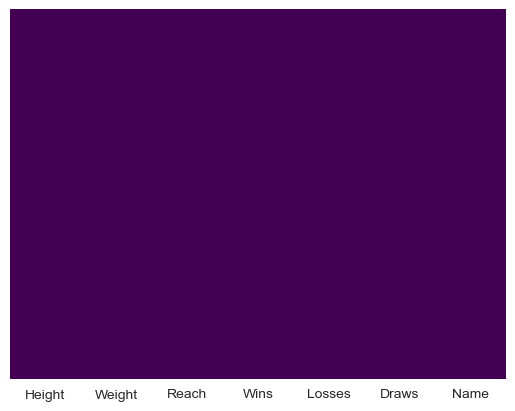

In [699]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')